In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# importing data using Panda
data = pd.read_csv("FuelConsumption.csv")

In [7]:
# describe the data
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [24]:
# Extracting a few columns from the data to plot

header = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
header.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


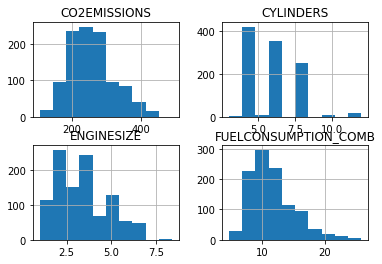

In [9]:
header.hist()

plt.show()

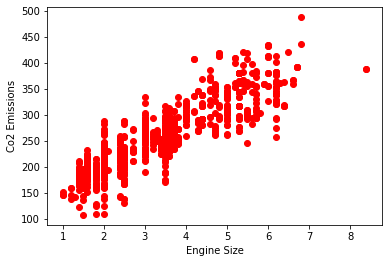

In [23]:
plt.scatter(header.ENGINESIZE,header.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size')
plt.ylabel ('Co2 Emissions')
plt.show()
# check the linearity or non linearity of the attribute

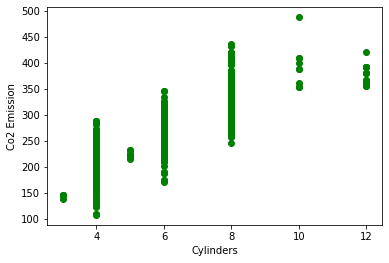

In [27]:
plt.scatter(header.CYLINDERS, header.CO2EMISSIONS, color='green')
plt.xlabel('Cylinders')
plt.ylabel('Co2 Emission')
plt.show()

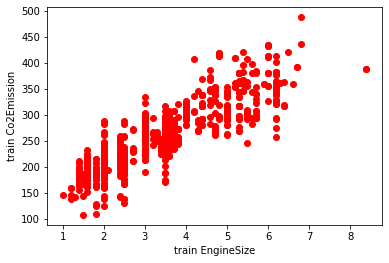

In [58]:
# Splitting the data
msk = np.random.rand(len(data)) < 0.8

# training data 80%
train = data[msk]
test = data[~msk]

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.xlabel('train EngineSize')
plt.ylabel('train Co2Emission')
plt.show()

In [83]:
# Training a linear model using scikitlearn

from sklearn import linear_model


model1 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

model1.fit(train_x,train_y)

print('coefficients is:', model1.coef_)
print('Intercept is :', model1.intercept_)



coefficients is: [[38.78971214]]
Intercept is : [126.85753989]


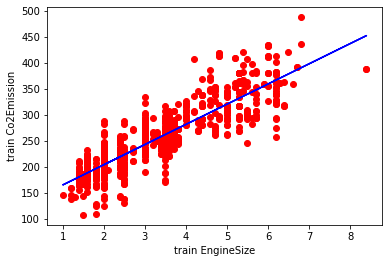

In [75]:
# Plotting the fitted curve and original data

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.plot(train_x, model1.coef_[0][0]*train_x + model1.intercept_[0], color='blue')
plt.xlabel('train EngineSize')
plt.ylabel('train Co2Emission')
plt.show()




In [82]:
## Evaluating the model based on MAE, MSE and RMSE

from sklearn.metrics import r2_score

y_hat = model1.predict(np.asanyarray(test[['ENGINESIZE']]))
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Mean absolute error is', np.mean(np.absolute(y-y_hat)))
print('Mean squared error is', np.mean((y-y_hat)**2))
print('RMS error is', np.sqrt(np.mean((y-y_hat)**2)))
print('R2 score (1 is best possible)', r2_score(y_hat, y))

Mean absolute error is 20.64907716942676
Mean squared error is 782.6745717833091
RMS error is 27.97632162710654
R2 score (1 is best possible) 0.7106077205566866


In [84]:
## Multiple Linear Regression

multi = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
multi.fit(train_x,train_y)

print('The coefficients are : %f',multi.coef_)
print('The bias/intercept is : %f ', multi.intercept_)





The coefficients are : %f [[10.32563947  7.97430192  9.4851646 ]]
The bias/intercept is : %f  [65.75792514]


In [87]:
## Prediction and evlautaion of multi regression

y_hat=multi.predict(np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]))

y = np.asanyarray(test[['CO2EMISSIONS']])


print('Mean absolute error is', np.mean(np.absolute(y-y_hat)))
print('Mean squared error is', np.mean((y-y_hat)**2))
print('RMS error is', np.sqrt(np.mean((y-y_hat)**2)))
print('R2 score (1 is best possible)', r2_score(y_hat, y))






Mean absolute error is 15.637661839663458
Mean squared error is 475.3631253656391
RMS error is 21.802823793390598
R2 score (1 is best possible) 0.8448075726403076
